# Lista 02 - Analisis de PCA

- Daniel Behar
- Cruz del Cid 


# Ejercicio 1

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

## Analisis Exploratorio

In [2]:
data = pd.read_csv('datasets/weather.csv', sep=',', header=0)
print(data.shape)
data.head()

(35, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,station
0,-3.9,-4.5,-2.3,1.2,5.4,10.9,15.5,15.3,11.6,6.9,3.4,-1.5,St. John’s
1,-7.1,-7.5,-3.1,2.3,8.5,14.5,18.3,17.8,13.5,8.1,2.9,-3.9,Charlottetown
2,-6.0,-6.1,-1.6,3.3,9.2,14.8,18.2,18.1,13.8,8.6,3.4,-2.9,Halifax
3,-4.7,-5.9,-2.5,2.0,7.4,13.2,17.7,17.6,13.5,8.4,3.8,-1.8,Sydney
4,-2.7,-3.2,0.3,4.7,9.2,13.4,16.3,16.4,13.6,9.5,5.2,-0.3,Yarmouth


In [3]:
print("Elementos del vector: ", data.station.count())
print("Elementos unicos: ", data.station.count())

Elementos del vector:  35
Elementos unicos:  35


### Descripción de Variables 

- 0 - 11 (float): indican las temperaturas de cada ciudad en cada mes del año. Siendo 0 enero y 11 diciembre. 
- station (string): es el nombre de las estaciones que recopilaron la informacion. 

In [4]:
# Datos perdidos
data.isna().sum()

0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
station    0
dtype: int64

In [5]:
# Tipos de las variables 

data.dtypes

0          float64
1          float64
2          float64
3          float64
4          float64
5          float64
6          float64
7          float64
8          float64
9          float64
10         float64
11         float64
station     object
dtype: object

In [6]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,35.000000,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,-14.171429,-11.842857,-6.942857,0.90000,7.974286,13.431429,16.442857,15.354286,10.454286,4.368571,-3.400000,-10.625714
std,9.654672,9.236255,8.636015,7.08258,5.245578,4.050474,3.590042,3.702491,4.355074,5.702464,7.734339,8.962023
min,-32.100000,-33.200000,-31.400000,-23.10000,-10.900000,-0.600000,4.100000,2.400000,-5.100000,-15.100000,-24.500000,-29.300000
25%,-21.100000,-16.350000,-9.850000,0.40000,7.500000,12.900000,15.300000,14.100000,9.600000,3.650000,-7.350000,-16.550000
50%,-12.100000,-10.800000,-4.500000,3.20000,9.300000,14.100000,17.300000,16.100000,11.600000,6.100000,-2.600000,-9.000000
75%,-6.650000,-6.100000,-2.050000,4.50000,10.950000,15.900000,18.650000,17.800000,13.550000,8.250000,3.000000,-3.500000
max,4.100000,5.800000,6.700000,9.10000,14.100000,18.300000,20.900000,19.800000,15.500000,10.800000,7.200000,5.300000


<AxesSubplot: >

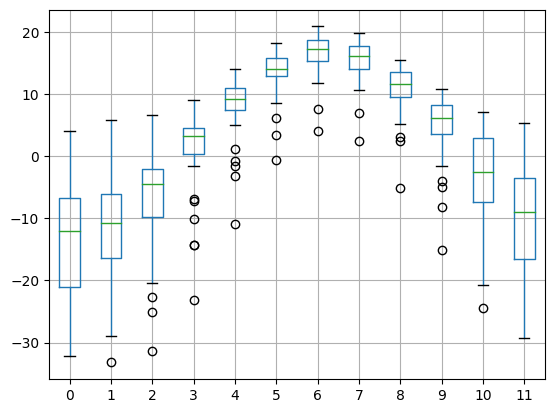

In [7]:
data.boxplot()

<Figure size 640x480 with 0 Axes>

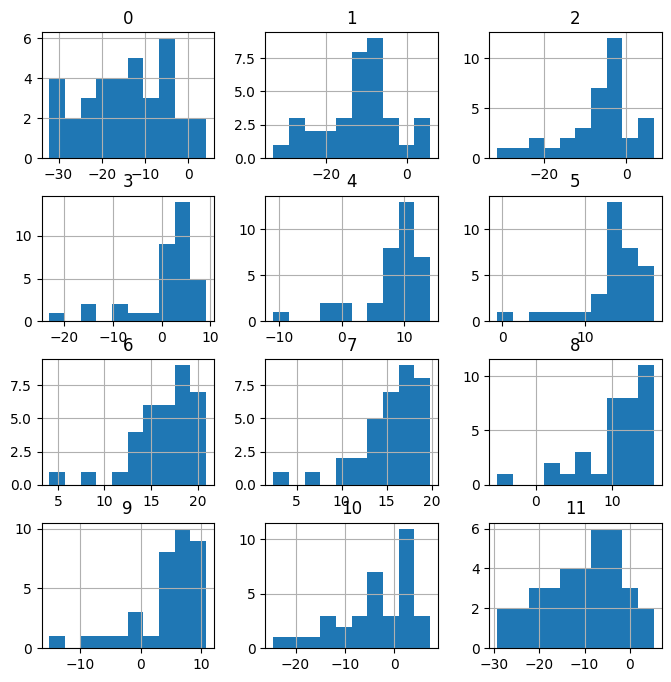

In [8]:
plt.figure()
data.hist(figsize=(8,8))
plt.show()

<Figure size 800x800 with 0 Axes>

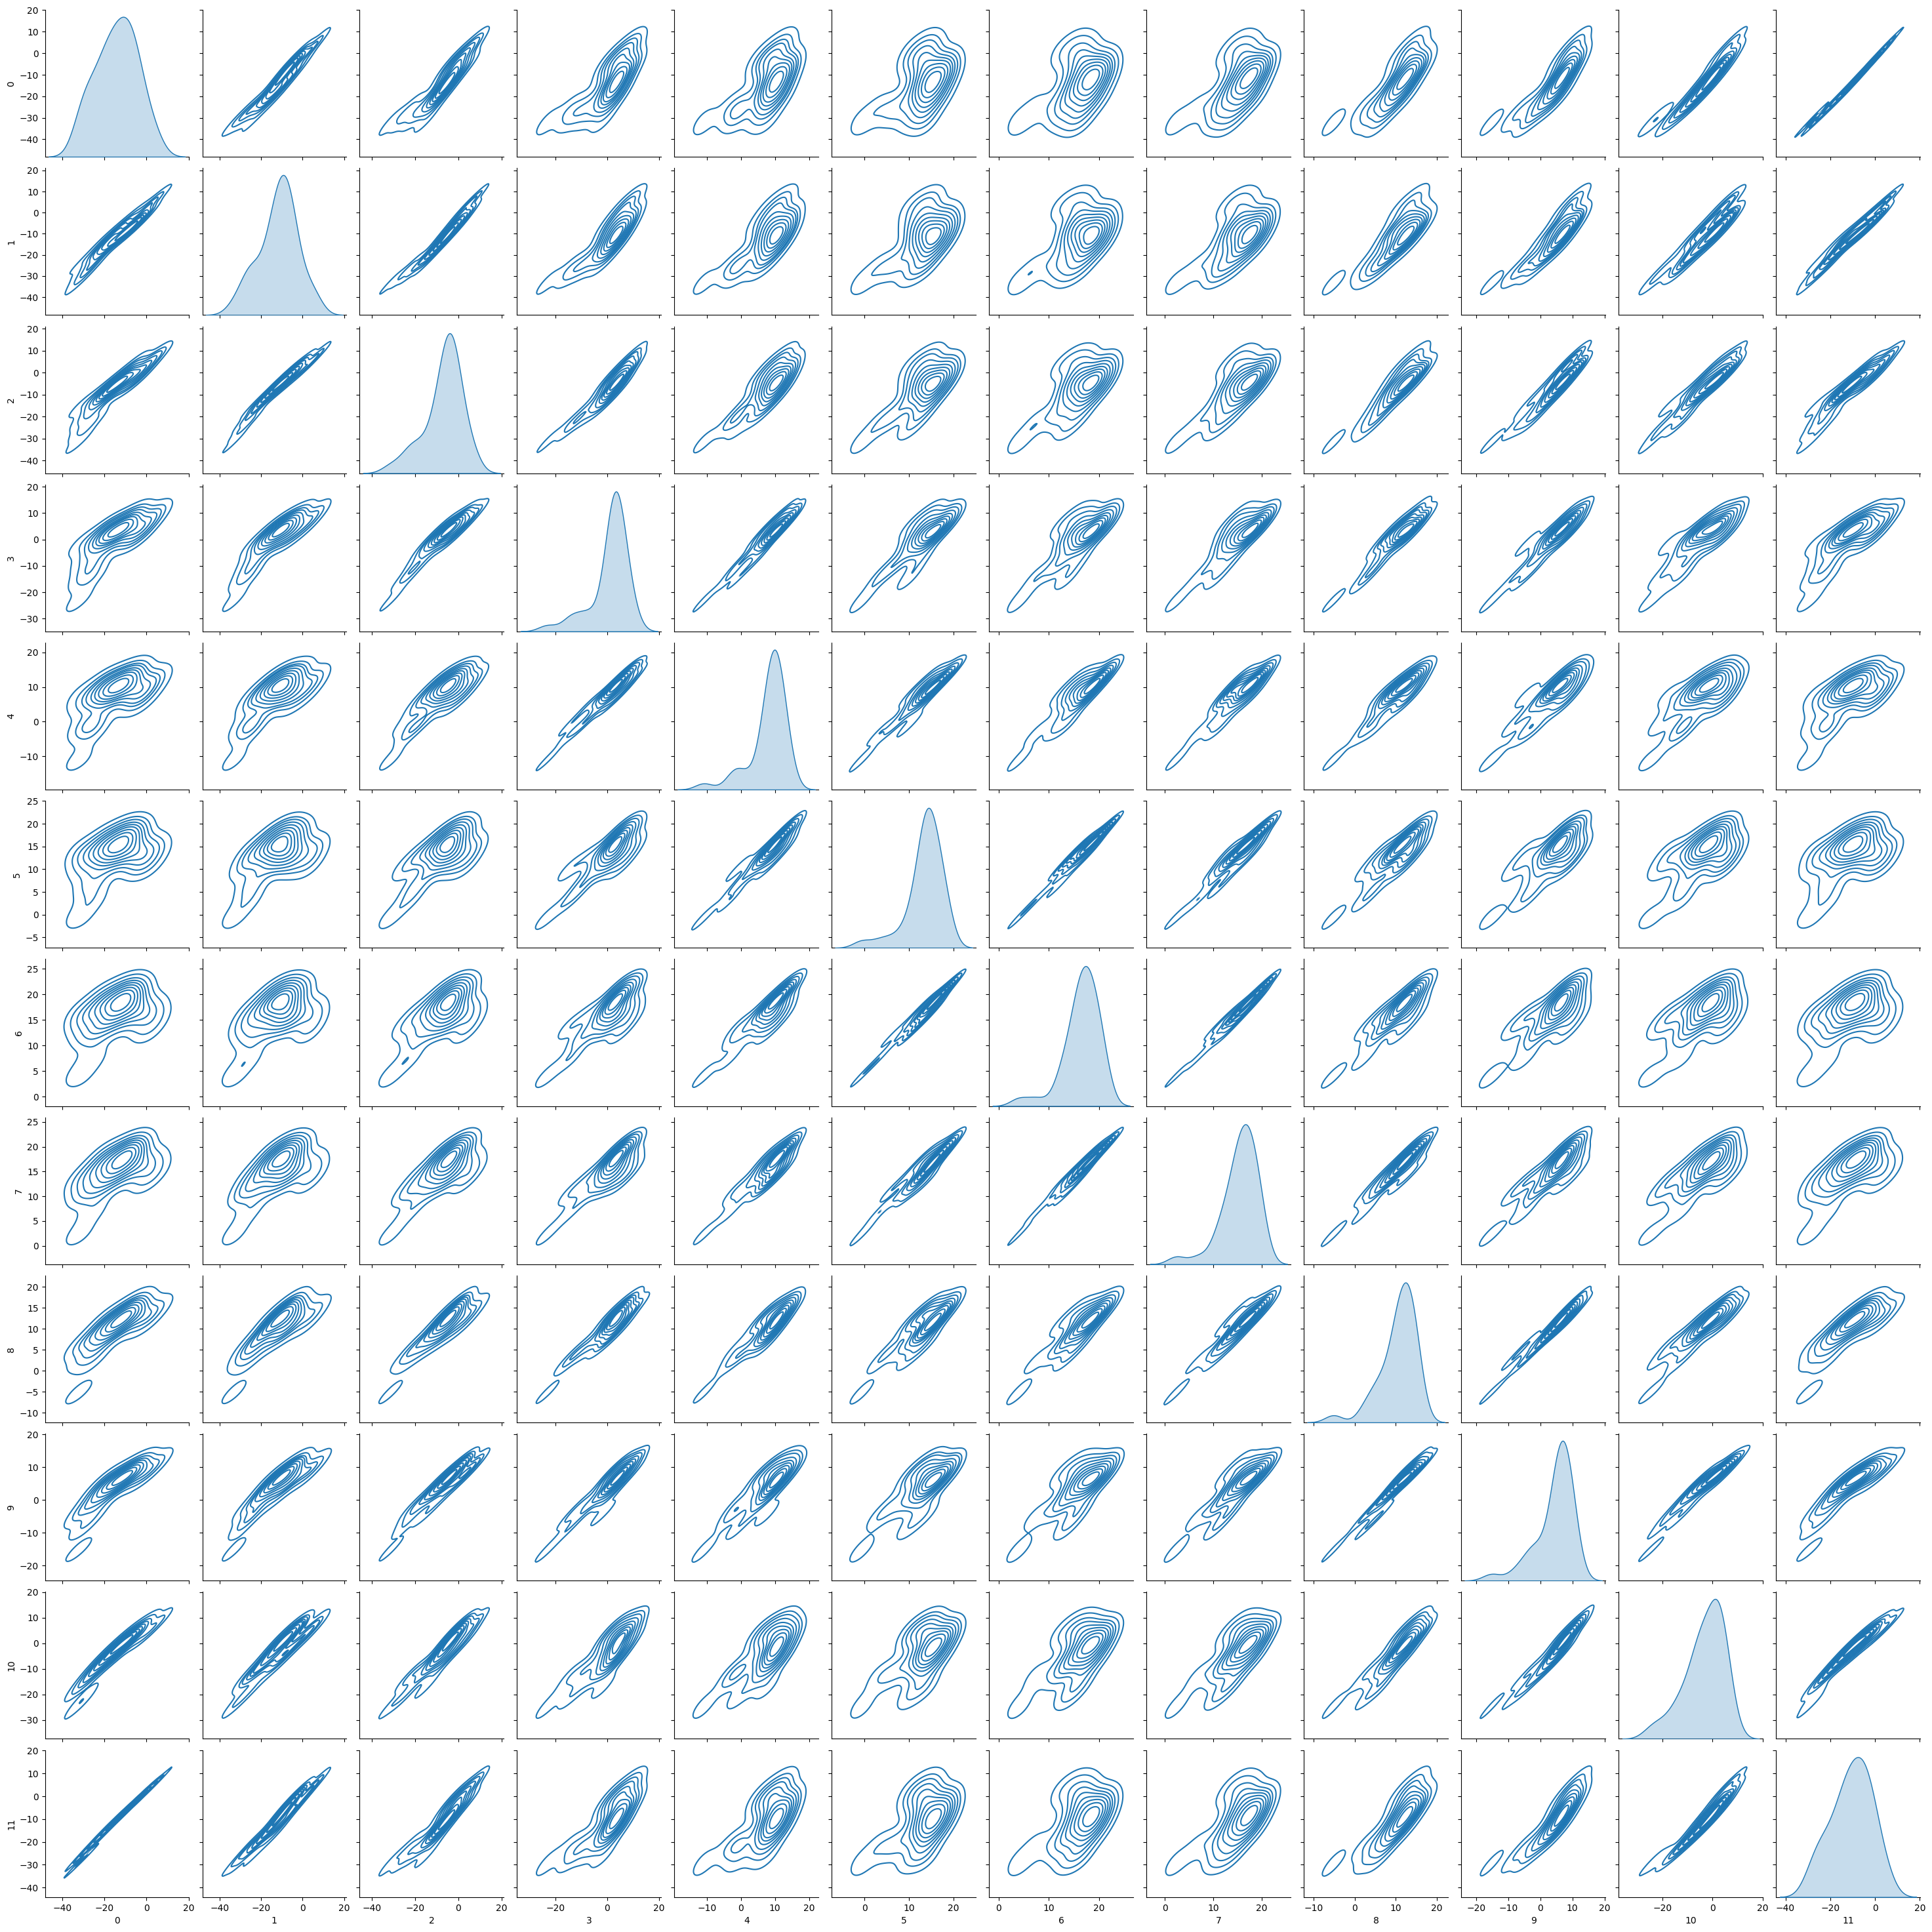

In [9]:
plt.figure(figsize=(8,8))
sns.pairplot(data, diag_kind='kde', kind='kde')
plt.show()

Todas las mediciones de temperatura en los distintos meses del año parecen tener un comporatamiento normal a partir del promedio, eso es de vital importancia para el análisis de PCA. Si el comportamiento no fuera normal, se tendría que hacer una modificación antes de la normalización de variables. 

## Estadarizacion

La estadarización sirve para que las distintas variables estén en la misma escala y se puedan compararar. También hace que al momento de entrenar un modelo las variables con escalas más grandes no sobreinfluencien el modelo.

In [10]:
names = data.values[:,-1] # contiene los nombres de los estados

X = data.values[:,:12].astype(np.float32)      # traemos sólo las primeras 8 columnas
X.shape

(35, 12)

In [11]:
names

array(['St. John’s', 'Charlottetown', 'Halifax', 'Sydney', 'Yarmouth',
       'Fredericton', 'Arvida', 'Montreal', 'Quebec City',
       'Schefferville', 'Sherbrooke', 'Kapuskasing', 'London', 'Ottawa',
       'Thunder Bay', 'Toronto', 'Churchill', 'The Pas', 'Winnipeg',
       'Prince Albert', 'Regina', 'Beaverlodge', 'Calgary', 'Edmonton',
       'Kamloops', 'Prince George', 'Prince Rupert', 'Vancouver',
       'Victoria', 'Dawson', 'Whitehorse', 'Frobisher Bay', 'Inuvik',
       'Resolute', 'Yellowknife'], dtype=object)

In [12]:
print(X)

[[ -3.9  -4.5  -2.3   1.2   5.4  10.9  15.5  15.3  11.6   6.9   3.4  -1.5]
 [ -7.1  -7.5  -3.1   2.3   8.5  14.5  18.3  17.8  13.5   8.1   2.9  -3.9]
 [ -6.   -6.1  -1.6   3.3   9.2  14.8  18.2  18.1  13.8   8.6   3.4  -2.9]
 [ -4.7  -5.9  -2.5   2.    7.4  13.2  17.7  17.6  13.5   8.4   3.8  -1.8]
 [ -2.7  -3.2   0.3   4.7   9.2  13.4  16.3  16.4  13.6   9.5   5.2  -0.3]
 [ -9.2  -8.4  -2.4   4.1  10.8  16.2  19.3  18.2  13.2   7.5   1.4  -6.5]
 [-15.  -13.1  -5.9   2.9  10.   15.9  18.4  16.9  11.9   6.1  -1.  -11.3]
 [-10.2  -9.   -2.5   5.7  13.   18.3  20.9  19.6  14.8   8.7   2.   -6.9]
 [-12.1 -10.8  -4.5   3.3  10.8  16.4  19.1  17.5  12.6   6.6  -0.2  -9. ]
 [-22.8 -21.2 -15.1  -7.2   1.2   8.6  12.6  10.8   5.2  -1.4  -9.  -19. ]
 [-11.7 -10.9  -4.3   3.6  10.6  15.5  17.8  16.5  12.1   6.6   0.4  -8.2]
 [-18.6 -16.2  -9.4   0.5   8.3  14.1  16.8  15.3  10.    4.4  -4.4 -14.7]
 [ -6.6  -6.1  -0.9   6.4  12.4  17.9  20.3  19.5  15.4   9.4   3.1  -3.5]
 [-10.9  -9.5  -3.    5.6

In [13]:
# Estandarizacion 

mu = X.mean(axis=0)     # cector con las medias 
std = X.std(axis=0)     # vector con las desviaciones estandar 
Xc = (X - mu) / std     # vector con los datos estandazarizados y centrados

In [14]:
Xc.mean(axis=0)     # medias de datos estandarizados (deben ser 0 o cercanas)

array([ 3.4059799e-08,  1.3623919e-08,  3.0653819e-08,  3.7465778e-08,
       -6.3010624e-08,  1.4901161e-07,  3.4517475e-07, -1.3368471e-07,
       -1.9924981e-07,  9.8773413e-08, -4.7683717e-08,  1.0558537e-07],
      dtype=float32)

In [16]:
a = pd.DataFrame(Xc)
a

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.079414,0.806610,0.545465,0.042976,-0.497918,-0.634095,-0.266465,-0.014876,0.266916,0.450399,0.892032,1.033131
1,0.743129,0.477061,0.451477,0.200554,0.101684,0.267666,0.524856,0.670203,0.709558,0.663907,0.826441,0.761425
2,0.858727,0.630851,0.627704,0.343807,0.237077,0.342812,0.496595,0.752412,0.779449,0.752868,0.892032,0.874636
3,0.995343,0.652821,0.521968,0.157578,-0.111078,-0.057970,0.355288,0.615397,0.709558,0.717284,0.944504,0.999168
4,1.205521,0.949415,0.850925,0.544361,0.237077,-0.007872,-0.040373,0.286558,0.732855,0.912999,1.128158,1.168984
5,0.522442,0.378197,0.533716,0.458409,0.546549,0.693497,0.807471,0.779816,0.639667,0.557153,0.629669,0.467076
6,-0.087074,-0.138097,0.122520,0.286506,0.391813,0.618350,0.553118,0.423574,0.336807,0.308061,0.314835,-0.076336
7,0.417353,0.312287,0.521968,0.687613,0.972073,1.219524,1.259655,1.163460,1.012419,0.770661,0.708378,0.421792
8,0.217684,0.114557,0.286998,0.343807,0.546549,0.743595,0.750949,0.587993,0.499886,0.397022,0.419780,0.184049
9,-0.906767,-1.027879,-0.958339,-1.160347,-1.310282,-1.210220,-1.086048,-1.248018,-1.224088,-1.026361,-0.734614,-0.948061


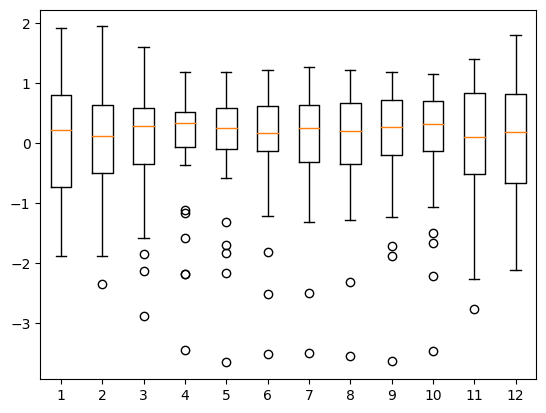

In [17]:
# Comparacion de variables
plt.boxplot(a)
plt.show()

Se pueden ver algunas observaciones fuera  del rango. 

## Análsis PCA

In [18]:
U, S, V = np.linalg.svd(Xc)

In [19]:
X1 = Xc @ (V[:1,:].T)         #@np.diag(S[:1])
X1.shape

(35, 1)

#### Una dimensión 

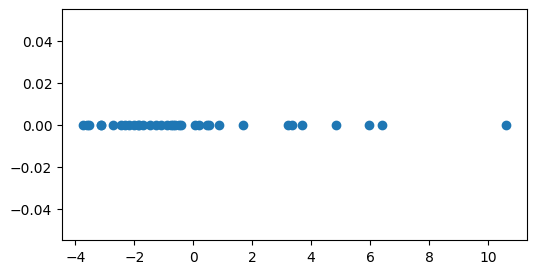

In [20]:
plt.figure(figsize=(6,3))
#plt.plot(X1, np.zeros(X1.shape), 'bo')
plt.scatter(X1, np.zeros(X1.shape))
plt.show()

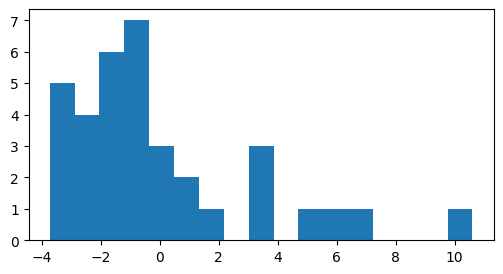

In [21]:
plt.figure(figsize=(6,3))
plt.hist(X1, bins=17)
plt.show()

Pasar estos varoles a sus datos normales, quitarles la normalización 

#### Dos dimensiones

In [22]:
X2 = Xc @ (V[:2,:].T)     #@np.diag(S[:2])
X2.shape

(35, 2)

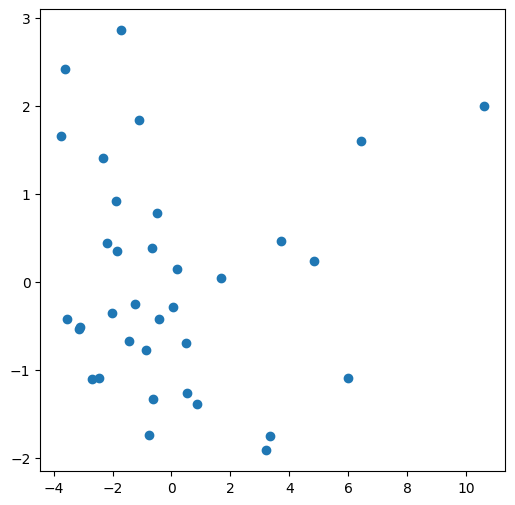

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(X2[:,0], X2[:,1])
plt.show()

<Figure size 640x480 with 0 Axes>

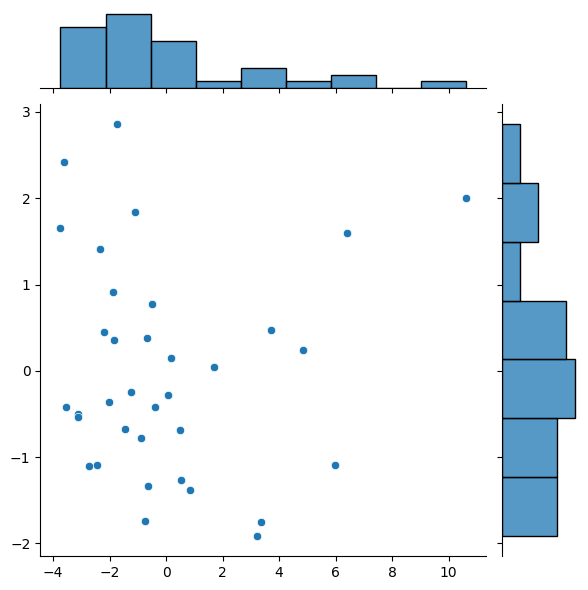

In [24]:
plt.figure()
sns.jointplot(x=X2[:,0], y=X2[:,1], kind='scatter')
plt.show()

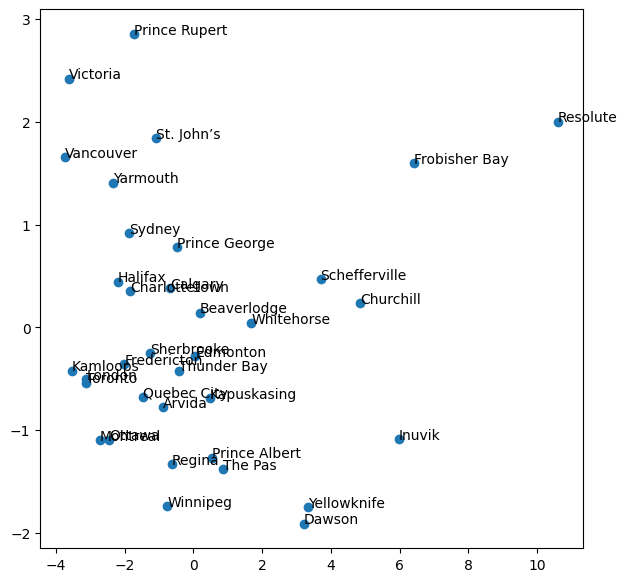

In [25]:
fig = plt.figure(figsize=(7,7))
plt.scatter(X2[:,0], X2[:,1])
for i in range(0, X2.shape[0]):
    plt.annotate(names[i], (X2[i,0], X2[i,1]))
plt.show()

## Análisis usando scikit-learn

In [26]:
from sklearn.decomposition import PCA

In [27]:
pcamodel = PCA(n_components=8)
pca2 = pcamodel.fit_transform(Xc)
pca2.shape

(35, 8)

In [28]:
pcamodel.explained_variance_

array([1.0479817e+01, 1.5356025e+00, 2.2927150e-01, 6.8605781e-02,
       1.7820124e-02, 1.0260144e-02, 5.1659532e-03, 3.2748925e-03],
      dtype=float32)

In [29]:
# dividir entre la suma para obtener porcentajes
ll = pcamodel.explained_variance_
ll / ll.sum()

array([8.4858072e-01, 1.2434211e-01, 1.8564768e-02, 5.5552055e-03,
       1.4429463e-03, 8.3079311e-04, 4.1830196e-04, 2.6517737e-04],
      dtype=float32)

In [30]:
pcamodel.explained_variance_ratio_

array([8.4836614e-01, 1.2431067e-01, 1.8560074e-02, 5.5538011e-03,
       1.4425814e-03, 8.3058310e-04, 4.1819620e-04, 2.6511034e-04],
      dtype=float32)

In [31]:
plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

In [32]:
def mybiplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

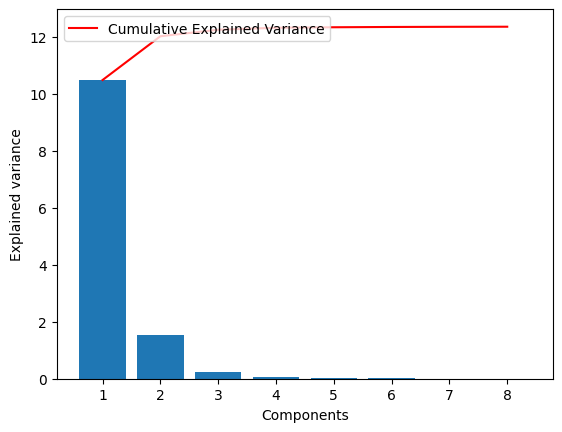

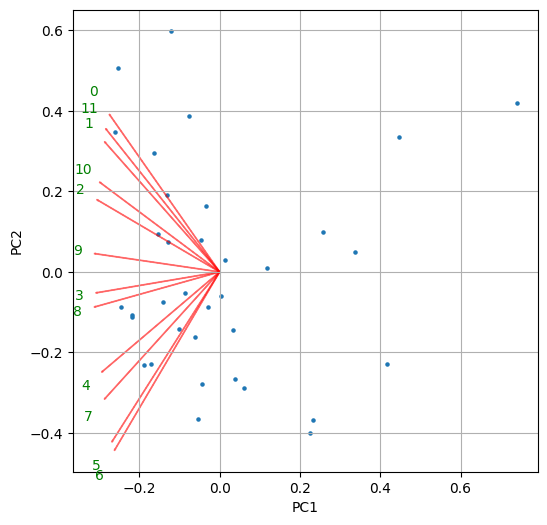

In [33]:
plt.figure(figsize=(6,6))
mybiplot(pca2[:,0:2], np.transpose(pcamodel.components_[0:2, :]), list(data.columns[:-1]))
plt.show()

- La varianza puede explicarse muy bien entre los primeros dos componentes principales
- En el 1er componente, mientras mas positivo es mas al norte esta la cuidad, y mientras mas negativo es mas al sur esta. Las ciudades muy cercanas poseen temperaturas similares durante todo el año
- En el 2do componente, mientras mas positivo es, mas frio es el mes del año y mientras mas negativo es, mas caliente es el mes del año. De igual forma, las ciudades mas "arriba" son mas afectadas por los meses frios, mientras que las ciudades mas "abajo", son afectadas por los meses mas calidos

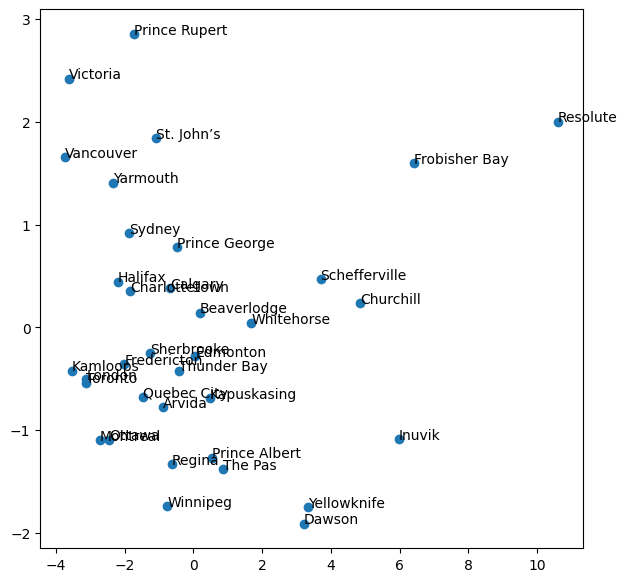

In [34]:
fig = plt.figure(figsize=(7,7))
plt.scatter(X2[:,0], X2[:,1])
for i in range(0, X2.shape[0]):
    plt.annotate(names[i], (X2[i,0], X2[i,1]))
plt.show()
